# HANDWRITTEN DIGIT RECOGNITION
### In this project I have used MNIST Handwritten images small dataset which is widely used for classification.


## Data Importing and Exploration

In [2]:
# Importing various libraries like pandas for operations on dataframes.
# numpy for working with numpy arrays and 
# matplotlib for plotting images
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Making dataframe by importing the dataset(csv file) with the pandas
data = pd.read_csv("mnist_train_small.csv")

In [4]:
# Printing first five rows of our dataset
data.head()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Describing the statistics of the data
data.describe()

,Unnamed: 0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
count,8000.00000,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,8000.0,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.0,8000.0,8000.0,8000.0
mean,3999.50000,4.444250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.174125,0.115500,0.070875,0.043125,0.042125,0.0,0.0,0.0,0.0,0.0
std,2309.54541,2.889106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.539846,4.082798,3.710670,2.333601,2.290307,0.0,0.0,0.0,0.0,0.0
min,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,1999.75000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,3999.50000,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,5999.25000,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,7999.00000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,187.000000,154.000000,0.0,0.0,0.0,0.0,0.0


In [6]:
# Printing the information about the columns of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 786 entries, Unnamed: 0 to 0.617
dtypes: int64(786)
memory usage: 48.0 MB


In [7]:
# To check the datatype of the data
type(data)

pandas.core.frame.DataFrame

In [8]:
# Converting dataframe in numpy arrays as we need it in so form while fitting th model.
data = data.values

In [9]:
# Again checking the datatype of the data
type(data)

numpy.ndarray

In [10]:
print(data)

[[   0    0    0 ...    0    0    0]
 [   1    4    0 ...    0    0    0]
 [   2    1    0 ...    0    0    0]
 ...
 [7997    5    0 ...    0    0    0]
 [7998    4    0 ...    0    0    0]
 [7999    0    0 ...    0    0    0]]


In [11]:
# Splitting data into dependent and independent variables(target variable)
X = data[:,2:]
y = data[:,1]

In [12]:
# Printing the dependent variable
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
# Printing the independent variable
y

array([0, 4, 1, ..., 5, 4, 0], dtype=int64)

## Splitting data into train and test data

In [14]:
# Importing the library
from sklearn.model_selection import train_test_split

In [15]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Data Visualization

In [16]:
# Making variable to plot some number
img = X_train[3]

In [17]:
# Checking shape of img variable
img.shape

(784,)

In [18]:

# Reshaping the variable for plotting image
img = img.reshape(28,28)

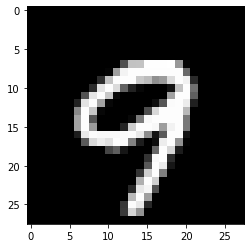

In [19]:
# PLotting image using matplotlib
plt.imshow(img, cmap="gray")
plt.show()

In [20]:
img = y_train[3]
img

9

# KNN (K Nearest Neighbors)

In [48]:
# creating a class in which various methods of KNN algorithm are described.
class KNN:
    
    def __init__(self, k=10):
        self.X = None
        self.y = None
        self.k = k
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, points):
        
        res = []
        
        for point in points:
            res.append(self.predict_point(point))
            
        return np.array(res, dtype=int)
    
    def predict_point(self, point):
        distances = []
        
        for x_item, y_item in zip(self.X, self.y):
            dis = KNN.distance(point, x_item)
            distances.append((dis, y_item))
        
        distances = sorted(distances)
        top = np.array(distances[:self.k])
        
        vals, counts = np.unique(top[:, 1], return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def accuracy(self, X, y):
        return sum(self.predict(X) == y) / len(y)
        
    @classmethod
    def distance(cls, p1, p2):
        return np.sum((p1 - p2) ** 2)

In [79]:
model = KNN(10)

In [80]:
model.fit(X_train, y_train)

In [81]:
model.predict(X_test[:10])

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 0])

In [82]:
y_test[:10]

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8], dtype=int64)

In [146]:
model.accuracy(X_test, y_test)

0.9371212121212121

## Checking accuracy using other classification algorithms on the same dataset.

# 1- Logistic Regression

In [84]:
# Imporing Logistic Regression for sklearn
from sklearn.linear_model import LogisticRegression

In [85]:
# Making object of Logistic Regression
lreg = LogisticRegression()

In [86]:
# Model Fitting
lreg.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# Finding accuracy on train data
lreg.score(X_train, y_train)

1.0

In [145]:
# Finding accuracy on test data
lreg.score(X_test, y_test)

0.8371212121212122

In [90]:
# Predicting the values
lreg.predict(X_test[:10])

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8], dtype=int64)

In [91]:
# Printing the actual values
y_test[:10]

array([9, 1, 4, 8, 0, 8, 2, 2, 4, 8], dtype=int64)

# 2- Naive Bayes

In [92]:
# Imporing Naive Bayes from sklearn
from sklearn.naive_bayes import MultinomialNB

In [93]:
# Making the object
nb = MultinomialNB()

In [94]:
# Model Fitting
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
# Finding accuracy on train data
nb.score(X_train, y_train)

0.842723880597015

In [144]:
# Finding accuracy in test data
nb.score(X_test, y_test)

0.8287878787878787

# After using different algorithms we have following results:-

### k nearest neighbor  :       0.93712
### Logistic regression  :      0.83712
### Naive Byes                 :     0.8287

# Clearly kNN is the most efficient among these three. 